In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = pd.read_csv("/kaggle/input/diabetes-prediction-in-america-dataset/diabetes_dataset.csv")

In [3]:
db

,Age,Gender,Ethnicity,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Smoking_Status,...,Insulin_Resistance,Heart_Disease_History,Physical_Activity_Level,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Stress_Level,Medication_Use,Diabetes_Diagnosis
0,69,Female,Other,39557,38.2,94.6,252.9,3.3,4,Never,...,5.1,0,Low,3,4,3641,8.7,Low,0,1
1,32,Male,Black,90663,33.6,167.0,282.6,4.6,7,Never,...,1.7,1,Moderate,8,0,3361,8.0,Low,1,0
2,89,Male,White,116180,39.4,100.6,106.8,6.1,5,Former,...,4.9,1,Low,9,8,2397,8.8,High,1,0
3,78,Male,Other,73059,40.6,111.1,169.7,7.4,9,Never,...,9.8,0,High,7,5,2491,6.4,Low,1,1
4,38,Female,White,35389,29.7,143.3,296.5,2.6,6,Never,...,1.7,1,Moderate,0,7,1325,6.6,High,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,Male,Black,99216,20.8,100.9,263.3,9.9,6,Current,...,6.4,1,Moderate,1,5,3812,4.3,Moderate,0,1
49996,35,Female,Asian,68404,42.6,138.0,220.8,2.6,14,Never,...,5.2,0,High,3,9,3935,9.3,Moderate,0,1
49997,46,Male,White,21337,44.9,179.2,211.1,7.7,9,Current,...,9.5,1,Moderate,5,2,2579,7.4,Moderate,1,0
49998,56,Male,Other,93760,24.6,179.4,292.1,7.9,6,Never,...,7.7,0,Low,6,0,1951,6.2,High,0,0


# Data Cleaning

In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             50000 non-null  int64  
 1   Gender                          50000 non-null  object 
 2   Ethnicity                       50000 non-null  object 
 3   Income                          50000 non-null  int64  
 4   BMI                             50000 non-null  float64
 5   Blood_Pressure                  50000 non-null  float64
 6   Cholesterol                     50000 non-null  float64
 7   Exercise_Hours_Per_Week         50000 non-null  float64
 8   Alcohol_Consumption_Per_Week    50000 non-null  int64  
 9   Smoking_Status                  50000 non-null  object 
 10  Family_History_Diabetes         50000 non-null  int64  
 11  Glucose_Level                   50000 non-null  float64
 12  HbA1c                           

In [5]:
db.isnull().sum()

Age                               0
Gender                            0
Ethnicity                         0
Income                            0
BMI                               0
Blood_Pressure                    0
Cholesterol                       0
Exercise_Hours_Per_Week           0
Alcohol_Consumption_Per_Week      0
Smoking_Status                    0
Family_History_Diabetes           0
Glucose_Level                     0
HbA1c                             0
Insulin_Resistance                0
Heart_Disease_History             0
Physical_Activity_Level           0
Fast_Food_Intake_Per_Week         0
Processed_Food_Intake_Per_Week    0
Daily_Caloric_Intake              0
Sleep_Hours_Per_Night             0
Stress_Level                      0
Medication_Use                    0
Diabetes_Diagnosis                0
dtype: int64

There are no null values in this dataset.

In [6]:
db.duplicated().sum()

0

In [7]:
db.describe()

,Age,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Family_History_Diabetes,Glucose_Level,HbA1c,Insulin_Resistance,Heart_Disease_History,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Medication_Use,Diabetes_Diagnosis
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,53.398700,85176.555140,31.818748,135.080956,200.185024,4.991036,7.004840,0.501920,135.015394,6.999164,5.510322,0.497880,4.508980,4.488260,2604.612420,7.000978,0.500880,0.502080
std,20.799006,37574.185279,7.637138,26.039637,57.737684,2.882748,4.324922,0.500001,37.458042,1.727541,2.594047,0.500001,2.863153,2.873003,807.340375,1.736496,0.500004,0.500001
min,18.000000,20000.000000,18.500000,90.000000,100.000000,0.000000,0.000000,0.000000,70.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1200.000000,4.000000,0.000000,0.000000
25%,35.000000,52551.000000,25.200000,112.400000,150.400000,2.500000,3.000000,0.000000,102.500000,5.500000,3.300000,0.000000,2.000000,2.000000,1911.000000,5.500000,0.000000,0.000000
50%,53.000000,85355.500000,31.800000,135.200000,200.300000,5.000000,7.000000,1.000000,135.300000,7.000000,5.500000,0.000000,5.000000,4.000000,2604.000000,7.000000,1.000000,1.000000
75%,71.000000,117782.750000,38.400000,157.600000,250.300000,7.500000,11.000000,1.000000,167.300000,8.500000,7.700000,1.000000,7.000000,7.000000,3298.000000,8.500000,1.000000,1.000000
max,89.000000,149997.000000,45.000000,180.000000,300.000000,10.000000,14.000000,1.000000,200.000000,10.000000,10.000000,1.000000,9.000000,9.000000,3999.000000,10.000000,1.000000,1.000000


In [8]:
#lets check if any columns has 0 as values that too where it doesnt make sense. 
db.isin([0]).sum(0)

Age                                   0
Gender                                0
Ethnicity                             0
Income                                0
BMI                                   0
Blood_Pressure                        0
Cholesterol                           0
Exercise_Hours_Per_Week             238
Alcohol_Consumption_Per_Week       3325
Smoking_Status                        0
Family_History_Diabetes           24904
Glucose_Level                         0
HbA1c                                 0
Insulin_Resistance                    0
Heart_Disease_History             25106
Physical_Activity_Level               0
Fast_Food_Intake_Per_Week          4942
Processed_Food_Intake_Per_Week     4983
Daily_Caloric_Intake                  0
Sleep_Hours_Per_Night                 0
Stress_Level                          0
Medication_Use                    24956
Diabetes_Diagnosis                24896
dtype: int64

They are zeroes in the columns but they are present in those columns where it is possible.

Data is cleaned they are no null values, no duplicate values in this dataset.

# Data Visualization

In [9]:
numeric_db = db.select_dtypes(include = ['int64', 'float64'])

correlation = numeric_db.corr()['Diabetes_Diagnosis'].sort_values(ascending = False)
correlation.head(10)

Diabetes_Diagnosis                1.000000
Alcohol_Consumption_Per_Week      0.005165
Age                               0.004277
Blood_Pressure                    0.004124
HbA1c                             0.003221
Heart_Disease_History             0.002578
Exercise_Hours_Per_Week           0.002071
Insulin_Resistance                0.001992
Sleep_Hours_Per_Night             0.001676
Processed_Food_Intake_Per_Week    0.001347
Name: Diabetes_Diagnosis, dtype: float64

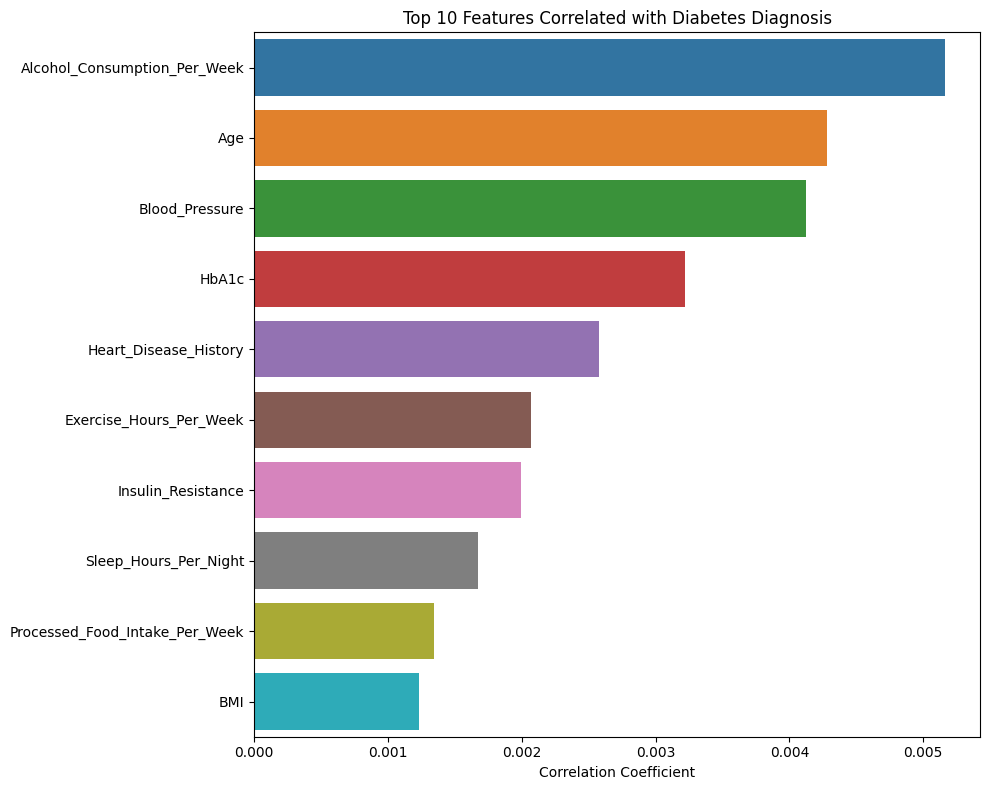

Diabetes_Diagnosis                  1.000 (Strong)
Alcohol_Consumption_Per_Week        0.005 (Strong)
Age                               0.004 (Moderate)
Blood_Pressure                    0.004 (Moderate)
HbA1c                             0.003 (Moderate)
Heart_Disease_History                 0.003 (Weak)
Exercise_Hours_Per_Week               0.002 (Weak)
Insulin_Resistance                    0.002 (Weak)
Sleep_Hours_Per_Night                 0.002 (Weak)
Processed_Food_Intake_Per_Week        0.001 (Weak)
Name: Diabetes_Diagnosis, dtype: object

In [10]:
#Features Correlated with Diabetes Diagnosis

plt.figure(figsize = (10,8))
top_features = correlation[1:11]
sns.barplot(x = top_features.values, y = top_features.index)
plt.title('Top 10 Features Correlated with Diabetes Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.005 else 'Moderate' if abs(x) > 0.003 else 'Weak'})").head(10)